# Air Traffic Data Analysis Tutorial

## 1. Introduction
For this package, we consider airlines traffic passenger statistics data. This tutorial will guide you through the steps of data preprocessing, data visualization, and data summarization using the provided classes: `DataPreProcessor`, `DataVisualizer`, and `DataSummary`. These classes are designed to clean the data, visualize trends, and generate insights from the air traffic dataset.



## 2. Setup

First, import the necessary libraries and load the dataset.

In [1]:
import sys
sys.path.append('./src')

import pandas as pd
from airline_traffic_analysis.data_preprocess import DataPreProcessor
from airline_traffic_analysis.data_visualization import DataVisualizer
from airline_traffic_analysis.summary import DataSummary

# Load the air traffic dataset (update the path accordingly)
df = pd.read_csv('./Air_Traffic_Passenger_Statistics.csv', index_col=0)

# Display the first few rows of the dataset
df.head()


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
index,,,,,,,,,,,,,,,,
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,gg,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
1,200507,gg,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
1,200507,gg,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July



## 3. Data Preprocessing: `DataPreProcessor` Class

The `DataPreProcessor` class is responsible for cleaning and transforming the raw data into a usable format for analysis. It performs the following tasks:
- **Converting date columns** to the correct format.
- **Handling missing values**.
- **Removing duplicates**.

### Methods in the `DataPreProcessor` Class:
- `__init__(self, dataframe)`: Initializes the class with the dataset (which should be a Pandas DataFrame).
- `convert_date_columns(self)`: Converts the `Activity Period` column to a datetime format and extracts year and month.
- `handle_missing_values(self)`: Fills missing values by using the last valid observation (forward fill).
- `remove_duplicates(self)`: Removes any duplicate rows in the dataset.
- `preprocess(self)`: Runs all preprocessing steps (date conversion, missing values, duplicates, and new features).
  
### Using the `DataPreProcessor` Class:


In [2]:
# Create an instance of DataPreProcessor
preprocessor = DataPreProcessor(df)

# Run the preprocessing steps and see the output
processed_data = preprocessor.preprocess()

# Check the processed data
processed_data.head()


/Users/maria/Desktop/Airline_Traffic/airlines_traffic/./src/airline_traffic_analysis/data_preprocess.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill',inplace=True)


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Formatted_Activity_Period
index,,,,,,,,,,,,,,,,,
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,2005-07
1,2005-07-01,gg,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,2005-07
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,2005-07
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,2005-07
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,2005-07


## 4. Data Visualization: `DataVisualizer` Class

The `DataVisualizer` class allows you to create various visualizations for the dataset. You can visualize:
- **Passenger count over time**.
- **Total passenger count by airline**.
- **Monthly traffic trends**.
- **Yearly/monthly heatmaps of traffic**.

### Methods in the `DataVisualizer` Class:
- `__init__(self, dataframe)`: Initializes the class with the dataset.
- `plot_passenger_count_over_time(self)`: Plots the passenger count over time (`Activity Period` vs `Passenger Count`).
- `plot_passenger_count_by_airline(self)`: Creates a bar plot of total passenger count by airline. In this plot, due to higher number of    airlines, we filtered it to 10.
- `plot_monthly_traffic_trend(self)`: Plots a line chart showing monthly passenger traffic trends.
- `plot_year_month_heatmap(self)`: Creates a heatmap showing the traffic by Year and Month.

### Using the `DataVisualizer` Class:

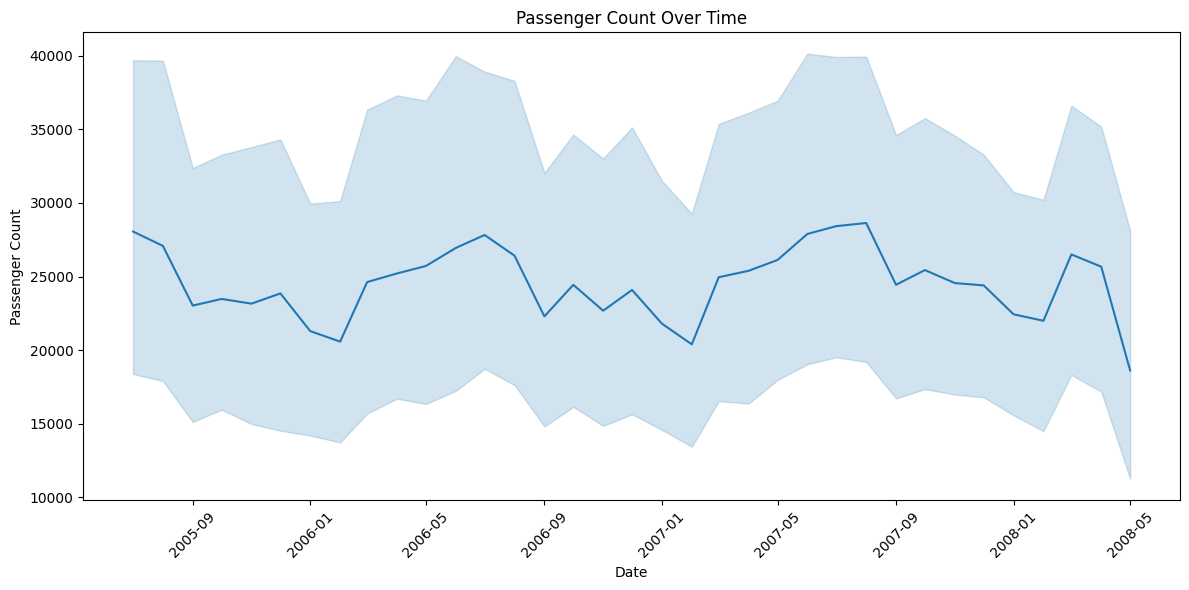

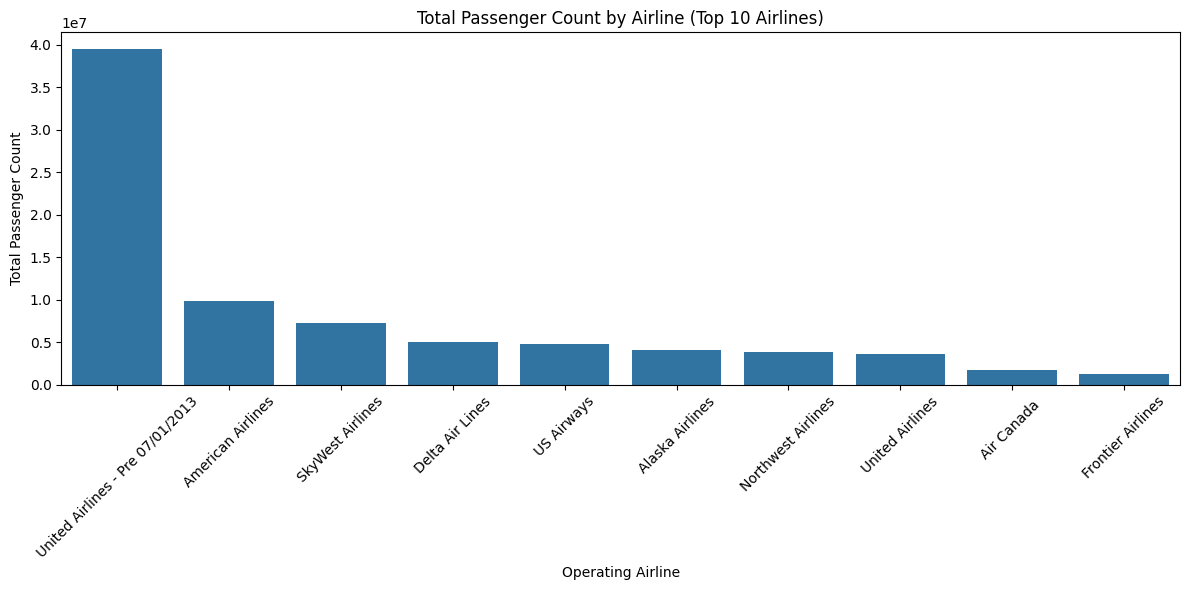

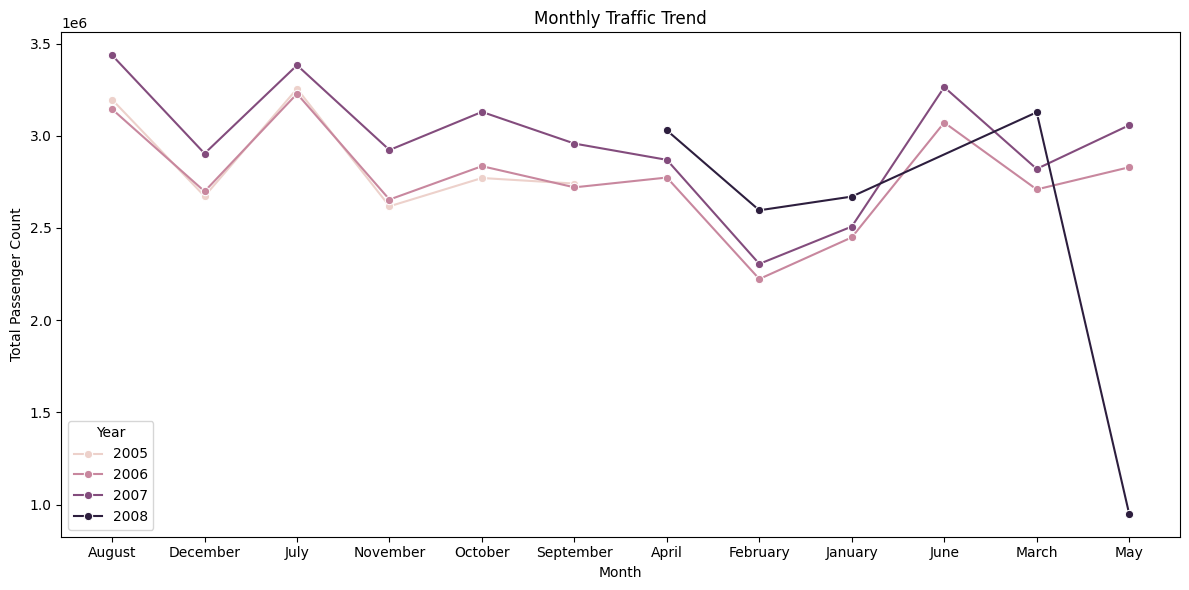

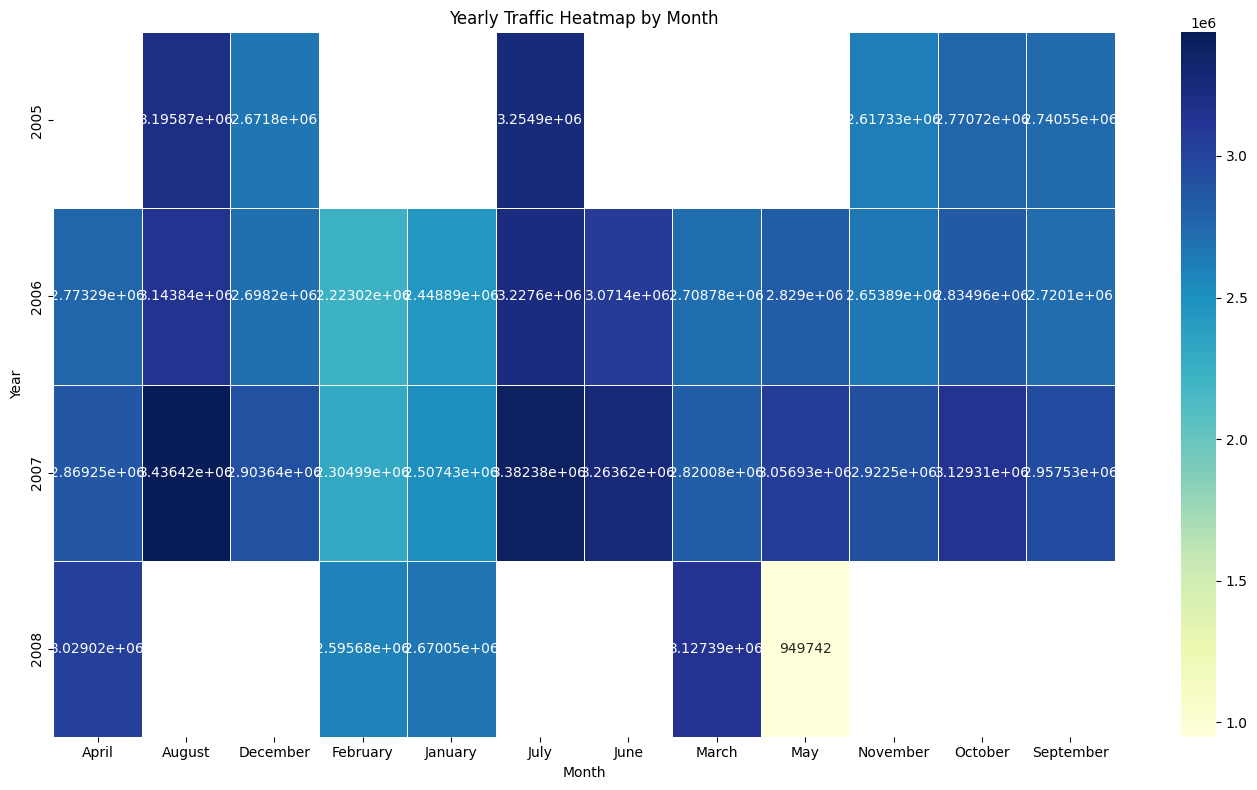

In [3]:

# Create an instance of DataVisualizer
visualizer = DataVisualizer(processed_data)

# Plot passenger count over time
visualizer.plot_passenger_count_over_time()

# Plot total passenger count by airline
visualizer.plot_passenger_count_by_airline()

# Plot monthly traffic trend
visualizer.plot_monthly_traffic_trend()

# Create heatmap for traffic by Year and Month
visualizer.plot_year_month_heatmap()


## 5. Data Summary: `DataSummary` Class

The `DataSummary` class provides essential summary statistics and insights, including:
- **Descriptive statistics** for passenger counts.
- **Total traffic by airline**.
- **Monthly traffic breakdown**.
- **Year-on-year growth** of passenger traffic.

### Methods in the `DataSummary` Class:
- `__init__(self, dataframe)`: Initializes with the dataset.
- `summary_statistics(self)`: Returns summary statistics (mean, median, min, max, etc.) for passenger counts.
- `traffic_by_airline(self)`: Returns total traffic by each airline.
- `monthly_traffic_summary(self)`: Returns total traffic for each month.
- `year_on_year_growth(self)`: Calculates and returns the year-on-year growth of passenger traffic.

### Using the `DataSummary` Class:

In [5]:

# Create an instance of DataSummary
summary = DataSummary(processed_data)

# Show summary statistics for passenger count
print(summary.summary_statistics())

# Show total traffic by airline
print(summary.traffic_by_airline())

# Show monthly traffic summary
print(summary.monthly_traffic_summary())

# Show year-on-year growth
print(summary.year_on_year_growth())


count      3998.000000
mean      24639.843672
std       52556.991868
min           1.000000
25%        4720.250000
50%        8401.500000
75%       20331.750000
max      443656.000000
Name: Passenger Count, dtype: float64
                   Operating Airline  Passenger Count
0                       ATA Airlines           384764
1                         Aer Lingus            53086
2                         Aeromexico              524
3                        Air Canada           1740846
4                    Air Canada Jazz             4119
5                          Air China           394824
6                         Air France           674667
7                    Air New Zealand           472963
8                    AirTran Airways           563183
9                    Alaska Airlines          4031127
10                All Nippon Airways           421948
11                 American Airlines          9784862
12           American Eagle Airlines           283652
13                    


## 6. Conclusion

In this tutorial, we demonstrated how to:
- **Preprocess** the air traffic data using `DataPreProcessor`.
- **Visualize** trends and patterns using `DataVisualizer`.
- **Summarize** key statistics and insights using `DataSummary`.
